In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from __future__ import print_function
import os.path
import torch.nn.parallel
from PIL import Image
import PIL
import random
torch.manual_seed(1234)

In [2]:
f = open('../data/iris.txt', 'r').readlines()

N = len(f) - 1
iris = []

for i in range(0,N):
    line = f[i].split(',')
    iris.append(line)

random.shuffle(iris)

# print(iris)

iris = np.asarray(iris)

feature = iris[:,:-1]
feature = feature.astype(np.float)

label = iris[:,-1]

dic = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}


In [3]:
# divide train data and test data.
train_len = int(len(feature)*0.7)

train_feature = feature[:train_len]
test_feature = feature[train_len:]

train_label = label[:train_len]
test_label = label[train_len:]
# print(train_feature)
# print(test_label)

In [4]:
torch.Tensor(train_feature).shape

torch.Size([104, 4])

In [5]:
# make model

class model(nn.Module):
    def __init__(self):
        super(model,self).__init__()
        
        layers = []
        
        cur_dim = 16
        
        layers.append(nn.Linear(4,cur_dim))
        
        for i in range(0,2):
            layers.append(nn.Linear(cur_dim,cur_dim//2))
            layers.append(nn.ReLU(inplace = True))
            cur_dim = cur_dim//2
        
        # make probability for each class
        layers.append(nn.Linear(cur_dim,3))
#         layers.append(nn.Sigmoid())
        
        self.main = nn.Sequential(*layers)
        
    def forward(self, x):
        out = self.main(x)
        
        return out

In [6]:
nets = model()

# use crossentropyloss
criterion = nn.CrossEntropyLoss()
# use gradient descent optimizer, and apply lr = 0.1
optimizer = torch.optim.SGD(nets.parameters(), lr = 0.01)

In [7]:
loss_log = []

for epoch in range(0,200):
    running_loss = 0.
    correct = 0
    for i in range(0,train_len):
        input = train_feature[i,:]
        label = int(dic[train_label[i][:-1]])

        input = torch.FloatTensor(input).view(1,-1)
        label = torch.LongTensor([label])
        
        optimizer.zero_grad()
        #     print(label.shape)
        output = nets(input)
        #     print(output.shape, label.shape)
        loss = criterion(output, label)
        running_loss += loss.data
        loss.backward()
        optimizer.step()

        prediction = torch.max(output.data,1)[1]

        correct += 1 if prediction == label else 0
#         print(prediction, label)
        if i%50 == 0:
            print('epoch : %d , loss : %.6f, accuracy : %.6f' % (epoch+1, loss.data[0], 100 * 1.0 * correct/ (i+1)))
    loss_log.append(running_loss/(1.0*train_len))
    

/opt/conda/envs/pytorch-py35/lib/python3.5/site-packages/ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch : 1 , loss : 0.901460, accuracy : 100.000000
epoch : 1 , loss : 0.976810, accuracy : 35.294118
epoch : 1 , loss : 1.101259, accuracy : 38.613861
epoch : 2 , loss : 0.957404, accuracy : 100.000000
epoch : 2 , loss : 0.979549, accuracy : 35.294118
epoch : 2 , loss : 1.130689, accuracy : 38.613861
epoch : 3 , loss : 0.947159, accuracy : 100.000000
epoch : 3 , loss : 0.971764, accuracy : 35.294118
epoch : 3 , loss : 1.151249, accuracy : 38.613861
epoch : 4 , loss : 0.935331, accuracy : 100.000000
epoch : 4 , loss : 0.960981, accuracy : 35.294118
epoch : 4 , loss : 1.163885, accuracy : 38.613861
epoch : 5 , loss : 0.915331, accuracy : 100.000000
epoch : 5 , loss : 0.935357, accuracy : 35.294118
epoch : 5 , loss : 1.168208, accuracy : 38.613861
epoch : 6 , loss : 0.866212, accuracy : 100.000000
epoch : 6 , loss : 0.875531, accuracy : 35.294118
epoch : 6 , loss : 1.161340, accuracy : 38.613861
epoch : 7 , loss : 0.748357, accuracy : 100.000000
epoch : 7 , loss : 0.720592, accuracy : 35.

epoch : 55 , loss : 0.005131, accuracy : 98.039216
epoch : 55 , loss : 0.152001, accuracy : 94.059406
epoch : 56 , loss : 0.003853, accuracy : 100.000000
epoch : 56 , loss : 0.004967, accuracy : 98.039216
epoch : 56 , loss : 0.147093, accuracy : 94.059406
epoch : 57 , loss : 0.003501, accuracy : 100.000000
epoch : 57 , loss : 0.004787, accuracy : 98.039216
epoch : 57 , loss : 0.142437, accuracy : 93.069307
epoch : 58 , loss : 0.003078, accuracy : 100.000000
epoch : 58 , loss : 0.005056, accuracy : 100.000000
epoch : 58 , loss : 0.137991, accuracy : 94.059406
epoch : 59 , loss : 0.002035, accuracy : 100.000000
epoch : 59 , loss : 0.005508, accuracy : 100.000000
epoch : 59 , loss : 0.132642, accuracy : 96.039604
epoch : 60 , loss : 0.001960, accuracy : 100.000000
epoch : 60 , loss : 0.005252, accuracy : 100.000000
epoch : 60 , loss : 0.127925, accuracy : 95.049505
epoch : 61 , loss : 0.002032, accuracy : 100.000000
epoch : 61 , loss : 0.004470, accuracy : 100.000000
epoch : 61 , loss : 0

epoch : 108 , loss : 0.001300, accuracy : 100.000000
epoch : 108 , loss : 0.046266, accuracy : 96.039604
epoch : 109 , loss : 0.000695, accuracy : 100.000000
epoch : 109 , loss : 0.001340, accuracy : 100.000000
epoch : 109 , loss : 0.045450, accuracy : 97.029703
epoch : 110 , loss : 0.000667, accuracy : 100.000000
epoch : 110 , loss : 0.001236, accuracy : 100.000000
epoch : 110 , loss : 0.045104, accuracy : 96.039604
epoch : 111 , loss : 0.000652, accuracy : 100.000000
epoch : 111 , loss : 0.001269, accuracy : 100.000000
epoch : 111 , loss : 0.044329, accuracy : 97.029703
epoch : 112 , loss : 0.000644, accuracy : 100.000000
epoch : 112 , loss : 0.001184, accuracy : 100.000000
epoch : 112 , loss : 0.044012, accuracy : 96.039604
epoch : 113 , loss : 0.000619, accuracy : 100.000000
epoch : 113 , loss : 0.001203, accuracy : 100.000000
epoch : 113 , loss : 0.043274, accuracy : 97.029703
epoch : 114 , loss : 0.000617, accuracy : 100.000000
epoch : 114 , loss : 0.001129, accuracy : 100.000000

epoch : 160 , loss : 0.027712, accuracy : 96.039604
epoch : 161 , loss : 0.000289, accuracy : 100.000000
epoch : 161 , loss : 0.000577, accuracy : 100.000000
epoch : 161 , loss : 0.027458, accuracy : 96.039604
epoch : 162 , loss : 0.000312, accuracy : 100.000000
epoch : 162 , loss : 0.000611, accuracy : 100.000000
epoch : 162 , loss : 0.027213, accuracy : 96.039604
epoch : 163 , loss : 0.000340, accuracy : 100.000000
epoch : 163 , loss : 0.000636, accuracy : 100.000000
epoch : 163 , loss : 0.026976, accuracy : 96.039604
epoch : 164 , loss : 0.000363, accuracy : 100.000000
epoch : 164 , loss : 0.000655, accuracy : 100.000000
epoch : 164 , loss : 0.026739, accuracy : 96.039604
epoch : 165 , loss : 0.000559, accuracy : 100.000000
epoch : 165 , loss : 0.000667, accuracy : 100.000000
epoch : 165 , loss : 0.026702, accuracy : 96.039604
epoch : 166 , loss : 0.000294, accuracy : 100.000000
epoch : 166 , loss : 0.000569, accuracy : 100.000000
epoch : 166 , loss : 0.026470, accuracy : 96.039604


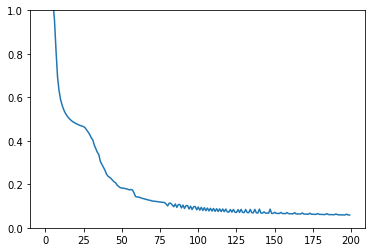

prediction : 1 real label : 1
accuracy : 100.0000
prediction : 2 real label : 2
accuracy : 100.0000
prediction : 1 real label : 1
accuracy : 100.0000
prediction : 0 real label : 0
accuracy : 100.0000
prediction : 0 real label : 0
accuracy : 100.0000
prediction : 2 real label : 1
accuracy : 83.3333
prediction : 2 real label : 2
accuracy : 85.7143
prediction : 1 real label : 1
accuracy : 87.5000
prediction : 0 real label : 0
accuracy : 88.8889
prediction : 1 real label : 1
accuracy : 90.0000
prediction : 0 real label : 0
accuracy : 90.9091
prediction : 2 real label : 2
accuracy : 91.6667
prediction : 2 real label : 2
accuracy : 92.3077
prediction : 2 real label : 2
accuracy : 92.8571
prediction : 2 real label : 2
accuracy : 93.3333
prediction : 2 real label : 2
accuracy : 93.7500
prediction : 2 real label : 2
accuracy : 94.1176
prediction : 1 real label : 1
accuracy : 94.4444
prediction : 2 real label : 2
accuracy : 94.7368
prediction : 0 real label : 0
accuracy : 95.0000
prediction : 1 

In [10]:
correct = 0

epochs = [i for i in range(0,200)]

plt.ylim([0,1])
plt.plot(epochs,loss_log)
plt.show()

for i in range(0, len(feature) - train_len):
    input = test_feature[i]
    label = int(dic[test_label[i][:-1]])

    
    input= torch.FloatTensor(input).view(1,-1)
    
    output = nets(input)
    
    prediction = torch.max(output.data,1)[1]
    
    correct += 1 if prediction == label else 0
    
    print('prediction : {} real label : {}'.format(prediction.item(), label))
    print('accuracy : %.4f' % (100 * 1.0 * correct/(i+1)))

